# Diabetes Classification Model

In this small project with dataset from kaggle I will create Multiclass Logistic Regression and Random Forest model to predict if person has diabetes or if has prediabetes. I will also check with features were important for Random Forest model to see if I can find some interesting insights. 

Dataset was already cleaned on kaggle site, so in this project I am more focused on preparing the model. 

Detailed description about dataset can be find in the link. <br />
Link do the model: 
https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

### 1. Importing packages

I will use basic packages for data manipulation and visualization. For model I will use LogisticRegression and RandomForestClassifier from sklearn. 

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression

### 2. Dataset overview 

I will load the dataset and perform EDA (Exploratory Data Analysis).

In [6]:
path = '...\diabetes_012_health_indicators_BRFSS2015.csv'
df = pd.read_csv(path)

In [ ]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [145]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


Becouse I will use Random Forest model I will use all features and let model choose which are more usefull. 

All features have float type, scikit-learn estimators will convert input data to float, so first I will check if there is a need of using one hot encoding for caterogical variables. If not, there is no reason to change variables type. 

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64


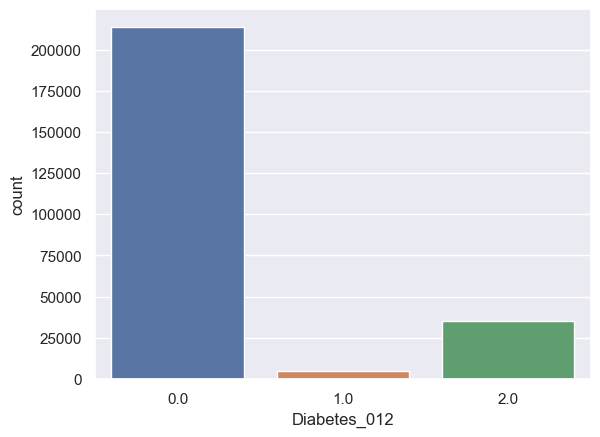

In [7]:
# Variable Diabetes_012 inform if person 0 - has no diabetes, 1 - has prediabetes, 2 - has diabetes. I will check distribution of each value in dataset. 
print(df['Diabetes_012'].value_counts())

sns.set_theme()
sns.countplot(x = 'Diabetes_012', data = df)
plt.show()

Values has high disproportion, it may have a negative impact on model. RandomForest is sensitive to class disproportion. In this situation I will use automatic oversampling, to copy samples of people with diabetes and prediabetes. This should eleminate this problem. 

*~During additional tests, model withot oversampling has accuracy smaller about 14 percentage points.~*

In [8]:
# List of all categorical variables, without Diabetes_012
categories = ['HighBP','HighChol','CholCheck','Smoker','Stroke','HeartDiseaseorAttack',
              'PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','DiffWalk','Sex', 'Education']


In [9]:
mult_cat = []
for category in categories:
    if len(df[category].unique()) > 2:
        mult_cat.append(category)

print(f'Categories with more than 2 category: {mult_cat}')


Categories with more than 2 category: ['Education']


Only education variable has more than 2 unique values, so only for this variable there is any sens to use get_dummies for pandas library. Using one hot encoding for Random Forest sometimes can by harmful for model accuracy, also chart of features importance will be less readable. I decided to not use one hot encoding for this varaible.

*~After additional tests, using one hot encoding did not improve model accuracy and made features importance chart less clear.~*

## 3. Splitting data.

In [10]:
y = df['Diabetes_012'].copy()
X = df.drop(columns = 'Diabetes_012').copy()

## 4. Data preparation

To reduce problem of categories disproportion I used RandomOverSampler.

In [13]:
oversample = RandomOverSampler(sampling_strategy='auto')
X_over, y_over = oversample.fit_resample(X, y)

print(X.shape)
print(X_over.shape)

(253680, 21)
(641109, 21)


In [14]:
# Each category has now the same number of samples.
y_over.value_counts()

0.0    213703
2.0    213703
1.0    213703
Name: Diabetes_012, dtype: int64

Scalling data

In [23]:
scaler = preprocessing.StandardScaler().fit(X_over)
X_scaled = scaler.transform(X_over)

Creating train and test set.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over , test_size = 0.2)

## 5. Multiclass Logistic Regression

In [25]:
lr = LogisticRegression(multi_class='multinomial', solver='sag')
lr.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='sag')

In [26]:
y_pred = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

In [27]:
train_accuracy = accuracy_score(y_train, y_pred_train )
test_accuracy = accuracy_score(y_test, y_pred)
print("Train_accuracy:", train_accuracy)
print("Test_accuracy:", test_accuracy)
print(classification_report(y_test, y_pred))

Train_accuracy: 0.5216002745244079
Test_accuracy: 0.5231785497028592
              precision    recall  f1-score   support

         0.0       0.59      0.66      0.63     42686
         1.0       0.43      0.32      0.37     42565
         2.0       0.51      0.59      0.55     42971

    accuracy                           0.52    128222
   macro avg       0.51      0.52      0.51    128222
weighted avg       0.51      0.52      0.51    128222



I did not get sufficient accuracy score for logistic regression. Parameter tunnig could not give good final score and will take long time to compute, so I will first check if Random Forest with basic parameters will be more effective, to see with model will be better to tune. 

## 4. Random Forest model with basic parameters

For test I want to create firt RandomForestClassifier with basic parameters. Then I will use GridSearchCV.

In [28]:
rf = RandomForestClassifier().fit(X_train, y_train)

In [29]:
y_pred = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

In [30]:
train_accuracy = accuracy_score(y_train, y_pred_train )
test_accuracy = accuracy_score(y_test, y_pred)
print("Train_accuracy:", train_accuracy)
print("Test_accuracy:", test_accuracy)
print(classification_report(y_test, y_pred))

Train_accuracy: 0.9937393616917567
Test_accuracy: 0.9626975090078146
              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94     42686
         1.0       0.99      1.00      1.00     42565
         2.0       0.91      0.99      0.95     42971

    accuracy                           0.96    128222
   macro avg       0.97      0.96      0.96    128222
weighted avg       0.96      0.96      0.96    128222



Model with basic parameters has very god accuracy on train and test set. Test accuracy is smaller only by 3 percent point so model does not have problem with overfitting. 

## 5. Model with GridSearchCV

In [285]:
param_dist = {'n_estimators' : [100, 200],
              'max_depth' : [2,None],
              'min_samples_leaf': [1,4],
              'min_samples_split': [2,4]}

grid = GridSearchCV(rf, param_grid = param_dist, cv=5)

In [286]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, None], 'min_samples_leaf': [1, 4],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200]})

In [287]:
print(f'Best parameters: {grid.best_params_}')

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [288]:
y_pred2 = grid.predict(X_test)
y_pred2_train = grid.predict(X_train)

In [289]:
train_accuracy2 = accuracy_score(y_train, y_pred2_train)
test_accuracy2 = accuracy_score(y_test, y_pred2)
print("Train accuracy:", train_accuracy2)
print("Test accuracy:", test_accuracy2)
print(classification_report(y_test, y_pred2))

Train accuracy: 0.9936613718031457
Test accuracy: 0.963454009452356
              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94     42582
         1.0       0.99      1.00      1.00     42620
         2.0       0.91      0.99      0.95     43020

    accuracy                           0.96    128222
   macro avg       0.97      0.96      0.96    128222
weighted avg       0.97      0.96      0.96    128222



Model created with GdridSearchCV has the same accuracy like model with bacis params, giving more params to choose may be helpful but computation time will be very long. Current model is good enough and there is no need to waste time on computation new GridSearchCV with more parameters.  

I will use model with basic parameters to show feature importances.

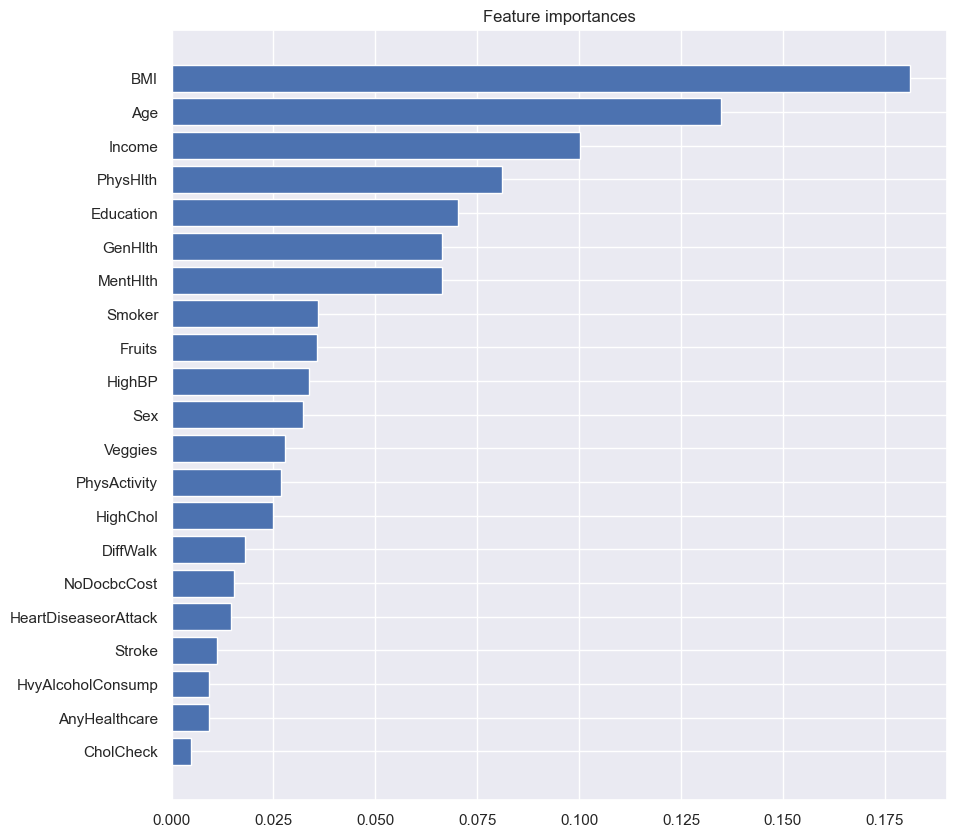

In [290]:
sort = rf.feature_importances_.argsort()
_ = plt.figure(figsize =(10,10))
plt.barh(X.columns[sort], rf.feature_importances_[sort])
plt.title('Feature importances')
plt.show()

Most important features like bmi, age or genreal health are directly connected to diabietes, so there is no suprise that this information will be usefull for model. Interesting insight is features like income and education have high importance for model. 

I think this is connected to the fact that healthy food is expensive and people with low income cannot affort to buy it. Education is correlated with income so it also can give information about if someone can affort healthy food. People with higher education may also be more aware of taking care about health. I will display distribution of diabietes and this features to check this insights.

## 6. Analysis of Income and Education features

In [270]:
# this funcion will be helpfull to check distribution of any feature
def show_feature(df, feature):
    """
    This funcion shows distribution plot of people without diabetes and prediabetes amoung groups of chosen feature.

    Input:
    df - chosen dataframe
    feature - chosen feature from df

    Return:
    funcion does not return any value, just show a plot
    """
    #grouping values to show percentage and creating new dataframe which will be used to creating plot
    df_inc =df.groupby([feature])['Diabetes_012'].value_counts(normalize=True) * 100
    df_inc = pd.DataFrame(round(df_inc, 2)).rename(columns = {'Diabetes_012':'Percentage'})
    df_inc.reset_index(inplace = True)

    #creating visualization 
    sns.barplot(data = df_inc[df_inc['Diabetes_012'] == 0], x = feature, y = 'Percentage')
    plt.title(f'Percentage of people with no diabetes or prediabetes in {feature} groups')
    plt.show()

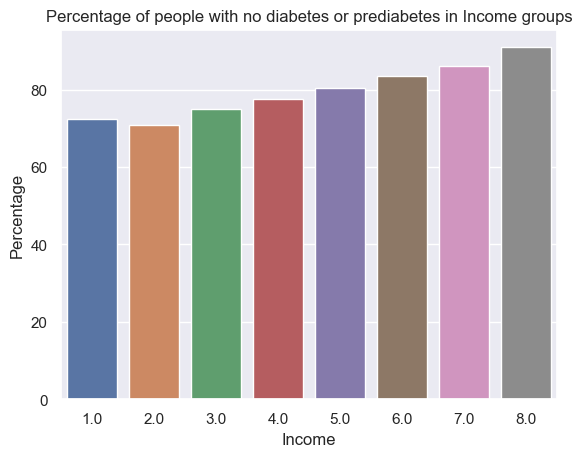

In [271]:
show_feature(df, 'Income')

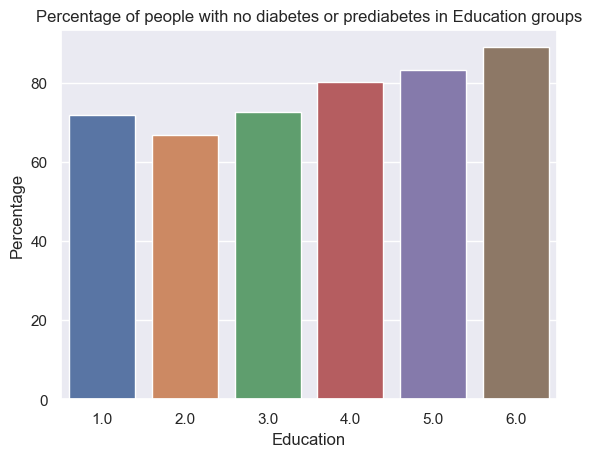

In [272]:
show_feature(df, 'Education')

We can see that higher income level gives higher percentage level of people without diabetes. 

Percentage values for education and income are very similar, so propably education feature is important only becouse is correlated with income feature.

## 7. Conclusion

* Created model has high accuracy on test and train set, so it does its task of classification.
* Most important features are directly connected to health.
* Income feature was also one of the most importand. Less income means bigger probability of diabetes. In my opinion it is connected with price of health and high quality food. It can be interesting topic of futer studies.

Thank You for reading my small project. <br />
*Łukasz* 